In [1]:
import matplotlib.pyplot as plt
import numpy as np
def set_font_func(ftsz):
    # set the fontsize for the plots
    plt.rcParams['xtick.labelsize']=ftsz
    plt.rcParams['ytick.labelsize']=ftsz
    plt.rcParams['axes.labelsize'] = ftsz
    plt.rcParams['legend.fontsize'] = ftsz
    plt.rcParams['axes.titlesize'] = ftsz
set_font_func(15)

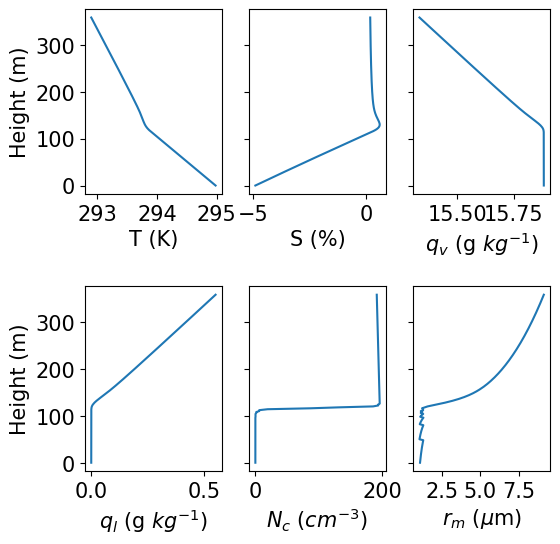

In [2]:
# read data from variables
cpmv = np.loadtxt('cpmv.txt')
step = cpmv[:,0]
height = cpmv[:,2]

var = {}
var['temp'] = cpmv[:,3]
var['press'] = cpmv[:,4]*1.0e-3 #hPa
var['sat'] = (cpmv[:,6]-1)*100
var['vmr'] = cpmv[:,11]*1.0e3
var['lmr'] = cpmv[:,12]*1.0e3
var['lwc'] = cpmv[:,14]*1.0e6
var['cdconc'] = cpmv[:,15]
var['rmean'] = cpmv[:,16]*1.0e4

# plot data from variables
label = ['T','S','$q_v$','$q_l$','$N_c$','$r_m$']
units = ['K','%','g $kg^{-1}$','g $kg^{-1}$','$cm^{-3}$','$\mu$m']
ii=0
(fig, axes) = plt.subplots(2,3,figsize=(6,6),sharey=True)
plt.subplots_adjust(hspace=0.5)
set_font_func(12)

for var_name in ['temp','sat','vmr','lmr','cdconc','rmean']: 
    
    ax = axes[ii//3,ii%3]
    ax.plot(var[var_name],height*0.01)
    ax.set_xlabel(label[ii] + f' ({units[ii]})')
    ii += 1
    
axes[0,0].set_ylabel('Height (m)')
axes[1,0].set_ylabel('Height (m)')

fig.savefig(f'./var',dpi=fig.dpi,bbox_inches='tight', pad_inches=0.5)
#plt.close()
       

In [3]:
# read data from droplet size distribution
nbin = cpmv[0,-1].astype(int)
cpmr = np.loadtxt('cpmr.txt')
step_r = cpmr[::3,0]
radius = cpmr[0::3,1:]*1.0e4 # micron
conc = cpmr[1::3,1:]
aero_st = cpmr[2::3,1:]

# estimate the bin width
def get_width(my_array):
    diff = my_array[1:] - my_array[:-1]
    left = my_array[0] - diff[0]/2
    right = my_array[-1] + diff[-1]/2
    width_final = np.append(np.append(left,my_array[:-1]+diff/2),right)
    return (width_final[1:] - width_final[:-1])


ntime = step_r.shape[0]
bin_w = np.zeros_like(radius)
for itime in range(ntime):
    if np.sum(aero_st[itime,:]==1)>1:
        bin_w[itime,:][aero_st[itime,:]==1] = get_width(radius[itime,:][aero_st[itime,:]==1])
    elif np.sum(aero_st[itime,:]==1)>1==1:
        bin_w[itime,:][aero_st[itime,:]==1] = np.nan
        
    if np.sum(aero_st[itime,:]>1)>1:
        bin_w[itime,:][aero_st[itime,:]>1] = get_width(radius[itime,:][aero_st[itime,:]>1])
    elif np.sum(aero_st[itime,:]>1)==1:
        bin_w[itime,:][aero_st[itime,:]>1] = np.nan


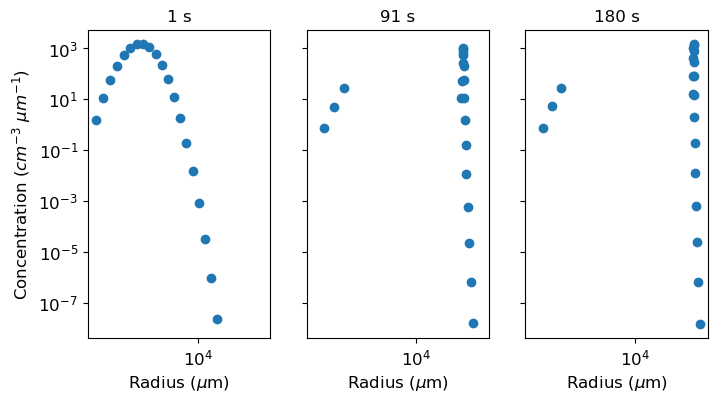

In [4]:
(fig, axes) = plt.subplots(1,3,figsize=(8,4),sharey=True,sharex=True)

for (ii,itime) in zip(np.arange(3), [0,int(ntime/2),ntime-1]):
    ax = axes[ii]
    ax.plot(radius[itime,:]*1.0e4,conc[itime,:]/bin_w[itime,:],'o')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('Radius ($\mu$m)')
    ax.set_title(f'{itime+1} s')
    if ii==0:
        ax.set_ylabel('Concentration ($cm^{-3}$ $\mu m^{-1}$)')
        
fig.savefig(f'./dsd',dpi=fig.dpi,bbox_inches='tight', pad_inches=0.5)